In [ ]:
!pip install ucimlrepo


In [ ]:
from ucimlrepo import fetch_ucirepo

# Cargar el dataset EEG Eye State
eeg_eye_state = fetch_ucirepo(id=264)

# Extraer datos y etiquetas
X = eeg_eye_state.data.features  # Señales EEG
y = eeg_eye_state.data.targets   # Estado de ojos (0=cerrado, 1=abierto)


In [ ]:
import pandas as pd

# Combinar en un solo DataFrame
df = pd.concat([X, y], axis=1)

# Guardar como CSV
df.to_csv("eeg_eye_state.csv", index=False)

# Mostrar los primeros registros
df.head()


,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,0
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,0
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,0
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,0
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,0


Index(['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6',
       'F4', 'F8', 'AF4', 'eyeDetection'],
      dtype='object')


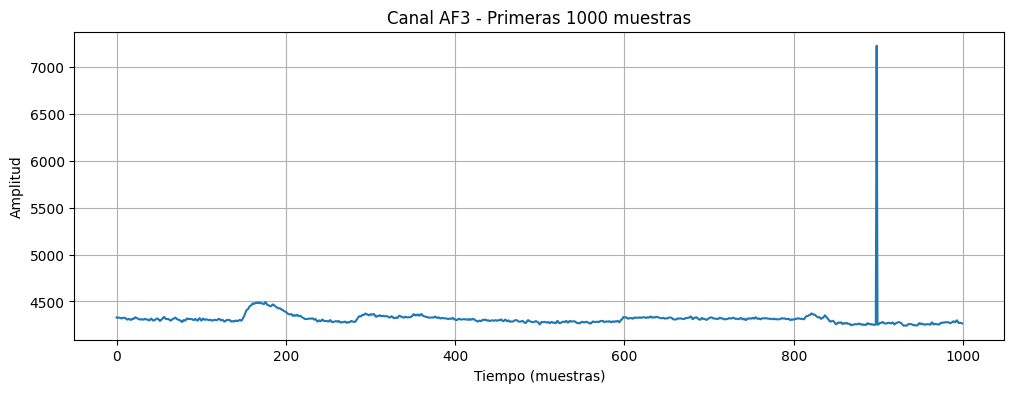

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo CSV
df = pd.read_csv('eeg_eye_state.csv')

# Ver columnas disponibles
print(df.columns)

# Visualizar una señal
plt.figure(figsize=(12, 4))
plt.plot(df['AF3'][:1000])  # Solo las primeras 1000 muestras
plt.title('Canal AF3 - Primeras 1000 muestras')
plt.xlabel('Tiempo (muestras)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()


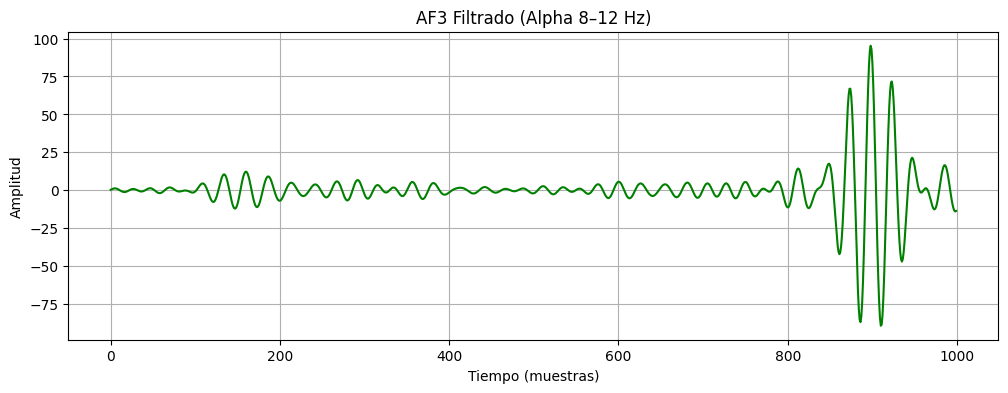

In [ ]:
from scipy.signal import butter, filtfilt

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)
    return y

# Parámetros del filtro
fs = 250  # Hz (frecuencia de muestreo estimada)
lowcut = 8
highcut = 12

# Aplicar filtro a EEG 1
eeg_raw = df['AF3'].values
eeg_filtered = bandpass_filter(eeg_raw, lowcut, highcut, fs)

# Graficar filtrado
plt.figure(figsize=(12, 4))
plt.plot(eeg_filtered[:1000], color='green')
plt.title('AF3 Filtrado (Alpha 8–12 Hz)')
plt.xlabel('Tiempo (muestras)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()


In [ ]:
from scipy.signal import welch
import numpy as np

# Calcular densidad espectral de potencia (PSD)
frequencies, power_spectrum = welch(eeg_alpha, fs=fs, nperseg=1024)

# Potencia en banda Alpha
alpha_band = (frequencies >= 8) & (frequencies <= 12)
alpha_power = np.sum(power_spectrum[alpha_band])

# Umbral arbitrario para "nivel de atención"
attention_threshold = 1e-5
attention = alpha_power > attention_threshold

print(f"Potencia Alpha: {alpha_power:.6f}")
print("Nivel de atención:", "ALTO" if attention else "BAJO")


Potencia Alpha: 508628.960272
Nivel de atención: ALTO


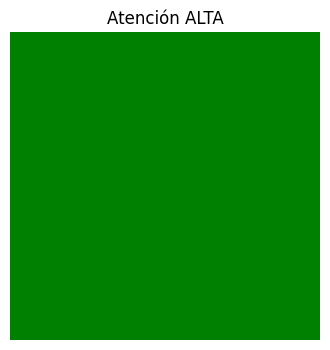

In [ ]:
import matplotlib.patches as patches

# Color: verde si hay atención, rojo si no
color = 'green' if attention else 'red'

# Simulación visual: ventana con color
fig, ax = plt.subplots(figsize=(4, 4))
rect = patches.Rectangle((0, 0), 1, 1, facecolor=color)
ax.add_patch(rect)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.axis('off')
plt.title("Atención ALTA" if attention else "Atención BAJA")
plt.show()


# Visualizacion completa

Index(['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6',
       'F4', 'F8', 'AF4', 'eyeDetection'],
      dtype='object')


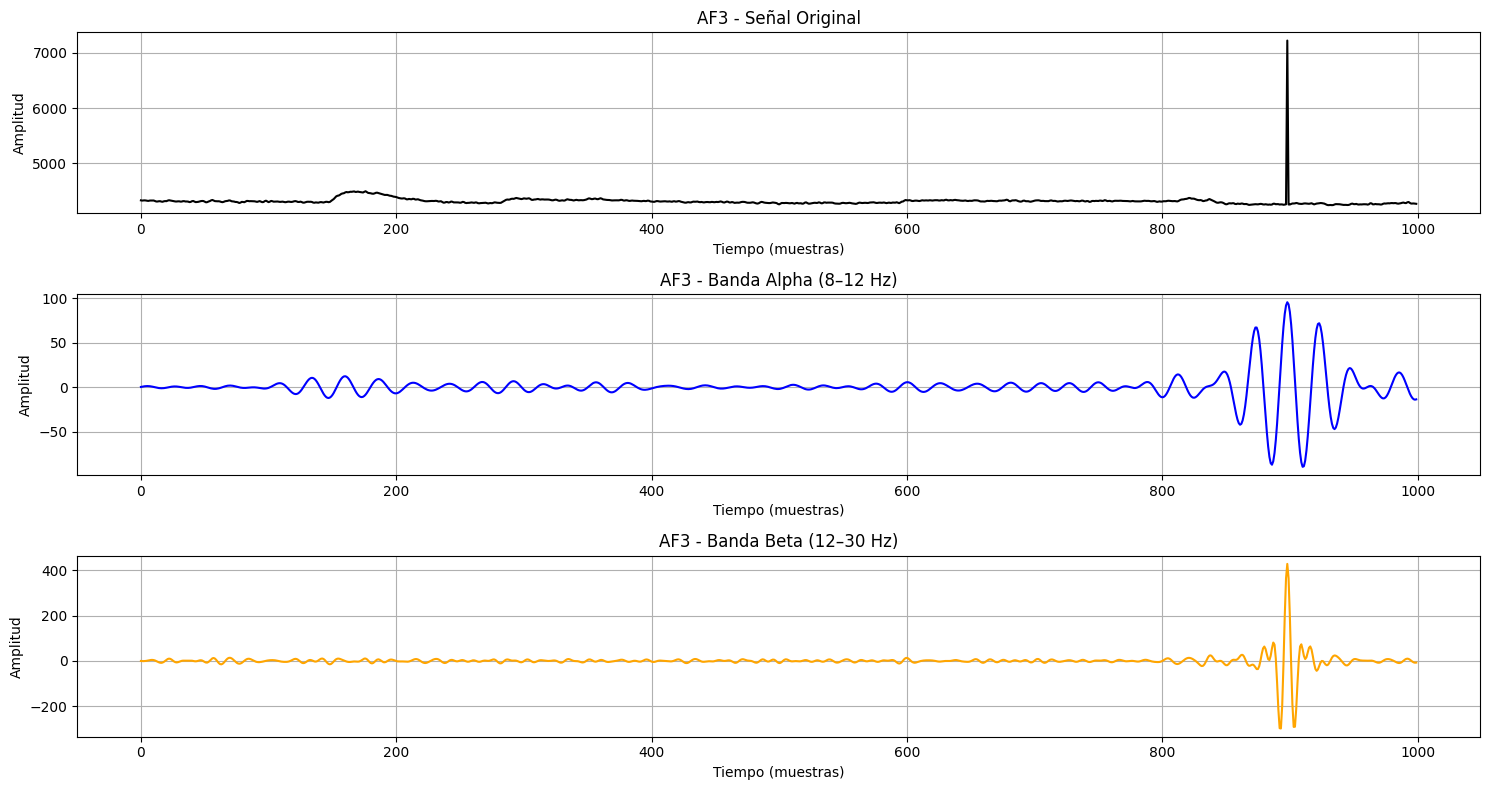

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# Cargar el archivo CSV
df = pd.read_csv('eeg_eye_state.csv')

# Ver columnas disponibles
print(df.columns)

# --- Filtro pasa banda ---
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)
    return y

# Parámetros generales
fs = 250  # Hz (frecuencia de muestreo estimada)
eeg_raw = df['AF3'].values  #cambiar a cualquier otra

# --- Filtrar banda Alpha (8–12 Hz) ---
alpha_filtered = bandpass_filter(eeg_raw, lowcut=8, highcut=12, fs=fs)

# --- Filtrar banda Beta (12–30 Hz) ---
beta_filtered = bandpass_filter(eeg_raw, lowcut=12, highcut=30, fs=fs)

# --- Graficar señales ---
plt.figure(figsize=(15, 8))

plt.subplot(3, 1, 1)
plt.plot(eeg_raw[:1000], color='black')
plt.title('AF3 - Señal Original')
plt.xlabel('Tiempo (muestras)')
plt.ylabel('Amplitud')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(alpha_filtered[:1000], color='blue')
plt.title('AF3 - Banda Alpha (8–12 Hz)')
plt.xlabel('Tiempo (muestras)')
plt.ylabel('Amplitud')
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(beta_filtered[:1000], color='orange')
plt.title('AF3 - Banda Beta (12–30 Hz)')
plt.xlabel('Tiempo (muestras)')
plt.ylabel('Amplitud')
plt.grid(True)

plt.tight_layout()
plt.show()

